# CPTR 512 Programming in Data Analytics

Harvey Alférez, PhD

## Unit 6. Supervised learning. Session 4

This unit is organized as follows:

- Introduction.pptx
- Feedforward Neural Networks.pdf
- ANN Neural Networks and Back-Propagation.pdf
- Examples...

In [35]:
#Example from https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

#Generates a random n-class classification problem:
X, y = make_classification(n_samples=100, random_state=1)
print(X)
print(y)

#Defaults 75% for training vs 25% for testing.

#stratify example: If your dataset has 51% of samples in class 0 and 49% in class 1, 
#you want both the training and test sets to have roughly the same proportions (51% 0 and 49% 1) to maintain consistency.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

print("Total number of samples in y_train:", len(y_train))
print("Total number of samples in y_test:", len(y_test))

print("Number of 1s in y:", np.sum(y == 1))
print("Number of 1s in y_train: (75.51%)", np.sum(y_train == 1))
print("Number of 1s in y_test: (24.49%)", np.sum(y_test == 1))

#random_state = 1. Determines random number generation for weights and bias initialization:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train) 

#Predict the probabilities of the first sample in X_test:
print(clf.predict_proba(X_test[:1]))

#Classify the five first samples:
print(clf.predict(X_test[:5, :]))

#Model accuracy:
print(clf.score(X_test, y_test))

[[ 0.6065484   0.81695766  1.05132077 ... -0.36453805  0.16466507
  -0.76780375]
 [-3.05376438  0.92116205 -1.45832446 ...  0.20437739 -1.55269878
  -0.4466992 ]
 [ 0.60640394  0.68064537  1.02124813 ...  1.03703898 -0.83001099
  -0.03599018]
 ...
 [-2.30803851 -1.42368943  1.14256392 ... -0.24701649 -0.37911961
   0.27610275]
 [-1.53702887  2.14957042  0.32455352 ...  2.15323347  1.31972591
  -0.8797298 ]
 [ 0.37167029 -0.95543218 -0.1484898  ... -0.6294416   0.14225137
   0.78002714]]
[1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0]
Total number of samples in y_train: 75
Total number of samples in y_test: 25
Number of 1s in y: 49
Number of 1s in y_train: (75.51%) 37
Number of 1s in y_test: (24.49%) 12
[[0.03838405 0.96161595]]
[1 0 1 0 1]
0.88


800
100


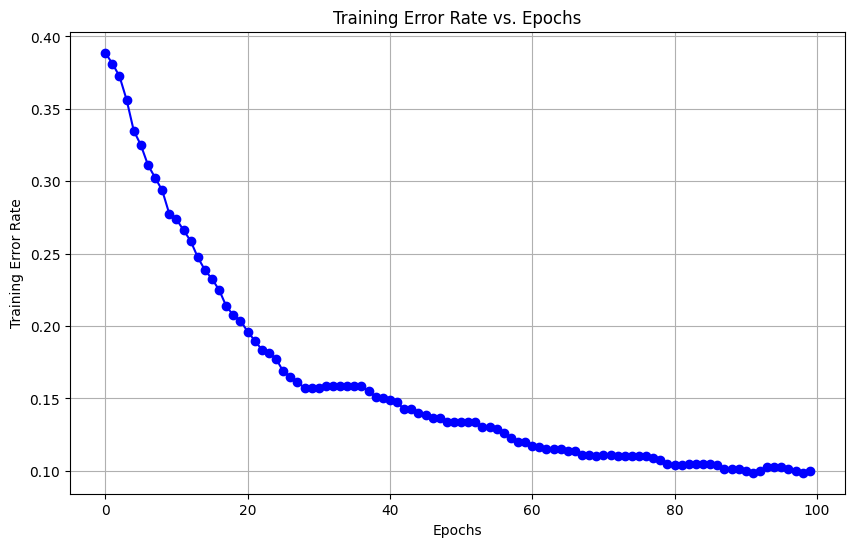

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Create synthetic data (2 classes, 0 and 1)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and validation sets
split_ratio = 0.8
split_idx = int(split_ratio * len(X))
print(split_idx)

#X[:split_idx]: This slice selects all rows from the beginning of X up to 
#(but not including) split_idx. 
#X[split_idx:]: This slice selects all rows from split_idx to the end of X. 
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# Initialize MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, random_state=42)

# Lists to store training error per epoch
train_errors = []

# Training loop
for epoch in range(mlp.max_iter):
    #This method trains the model for one epoch (i.e., one pass over the training data). 
    #It updates the model weights based on the provided data.
    
    # np.unique ensures that all unique classes present in y_train 
    #are considered during training (0 and 1 in this case):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train)) 
    
    # Make predictions on the training data for this epoch
    y_train_pred = mlp.predict(X_train)
    
    # Calculate the training error (1 - accuracy)
    train_error = 1.0 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)

# Plot the training error over epochs
plt.figure(figsize=(10, 6))
print(mlp.max_iter)
#The range(0, mlp.max_iter) expression is used to create a 
#sequence of numbers from 0 to mlp.max_iter - 1 (inclusive). 
plt.plot(range(0, mlp.max_iter), train_errors, marker='o', linestyle='-', color='blue')
plt.title('Training Error Rate vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Error Rate')
plt.grid()
plt.show()


In [26]:
#Example from https://edisciplinas.usp.br/pluginfile.php/4140540/mod_resource/content/1/mlp.pdf
import numpy as np
from sklearn.neural_network import MLPClassifier

# Setting the input samples.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Setting the expected outputs.
y_XOR = np.array([0, 1, 1, 0])

#hidden_layer_sizes=(5,) if you want only 1 hidden layer with 5 hidden units.
mlp = MLPClassifier(hidden_layer_sizes=(5,),
activation='tanh', max_iter=10000, random_state=10)
mlp.fit(X, y_XOR) 
#Predict the proabilities for each sample in X.
pred = mlp.predict_proba(X)
print("MLP's XOR probabilities:\n[class0, class1]\n{}".format(pred))

MLP's XOR probabilities:
[class0, class1]
[[0.90824236 0.09175764]
 [0.08283202 0.91716798]
 [0.04569506 0.95430494]
 [0.95730544 0.04269456]]


In [29]:
#Example from https://edisciplinas.usp.br/pluginfile.php/4140540/mod_resource/content/1/mlp.pdf

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#First of all, we load the dataset, encode its labels as int values and split it into training and test sets.

# Loading Breast Cancer dataset.
data = pd.read_csv('breast_cancer.csv')
# Creating a LabelEncoder and transforming the dataset labels.
le = preprocessing.LabelEncoder()
y = le.fit_transform(data['diagnosis'].values)
print(data['diagnosis'].values)
print(y)
# Extracting the instances data.
# axis=1: Refers to operations along the columns:
X = data.drop('diagnosis', axis=1).values
print(X)
# Splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=10)

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'benign' 'benign' 'benign' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'benign' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'benign' 'malignant'
 'benign' 'benign' 'benign' 'benign' 'benign' 'malignant' 'malignant'
 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'malignant' 'benign' 'malignant' 'malignant' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'malignant' 'benign' 'malignant' 'malignant' 'malignant'
 'benign' '

In [31]:
#tangent hyperbolic function (tanh)
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh',
max_iter=10000, random_state=10)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print("MLP's accuracy score: {}".format(accuracy))

MLP's accuracy score: 0.6288659793814433


In [47]:
#We can observe that its accuracy score was rather low. 
#Unfortunately, MLPs are very sensitive to different feature scales. 
#So, it is normally necessary to normalize or rescale the input data.

#Creating a StandardScaler. 
#Standardization is a technique to center the data around the mean and scale it based on the variance, 
#which often improves the performance and training stability of machine learning algorithms.
#      y = (x – mean) / standard_deviation
#      Where the mean is calculated as: mean = sum(x) / count(x)
#      And the standard_deviation is calculated as:
#      standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X_train)
# Scaling train and test data.
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test) # Training MLP with normalized data.
mlp.fit(X_train_scaled, y_train)
# Testing MLP with normalized data.
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) 
print("MLP's accuracy score: {}".format(accuracy))

MLP's accuracy score: 0.32


/Users/harveyalferez/anaconda3/envs/DataAnalyticsAI/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalization and standardization are two different techniques used to scale or transform data, typically to make it more suitable for machine learning algorithms. Although they serve similar purposes (scaling data), they differ in the way they transform the data.

### 1. **Normalization**:
Normalization scales the data to a fixed range, typically **between 0 and 1** (though other ranges like [-1, 1] are also used in some cases). The idea is to adjust the data so that it fits within a specific range, which can help ensure that all features contribute equally to the model.

#### Formula (Min-Max Normalization):

Xnorm = (X - Xmin)/(Xmax -Xmin)

Where:
- X is the original data,
- Xmin and Xmax are the minimum and maximum values of the feature, respectively.

#### When to Use:
- **When you know the data has bounded values** or you want the features to be between a specific range.
- **When you use algorithms** that rely on distances between data points (e.g., k-nearest neighbors, support vector machines, or neural networks), normalization ensures that larger features don’t dominate smaller ones.

### 2. **Standardization**:
Standardization scales the data based on the data's mean and standard deviation, transforming the data to have a **mean of 0** and a **standard deviation of 1**. This method ensures that the data follows a standard normal distribution.

#### Formula (Z-score Normalization):

Xstd = (X - u)/ o

Where:
- X is the original data,
- u (mu) is the mean of the data,
- o (sigma) is the standard deviation of the data.

#### When to Use:
- **When the data has varying scales** or follows a Gaussian (normal) distribution, standardization helps by centering and scaling the data.
- It is typically used in algorithms that assume the data follows a normal distribution, like **linear regression, logistic regression, and principal component analysis (PCA)**.

### Key Differences:

| Aspect              | Normalization                        | Standardization                           |
|---------------------|--------------------------------------|------------------------------------------|
| **Goal**            | Rescales data to a specific range (e.g., [0, 1] or [-1, 1]) | Centers data around 0 with a standard deviation of 1 |
| **Formula**         | Xnorm = (X - Xmin)/(Xmax -Xmin) | Xstd = (X - u)/ o |
| **Range of Values** | Typically [0, 1] or [-1, 1]           | No specific range (values can be negative or greater than 1) |
| **Use Cases**       | Suitable when the scale of data matters (e.g., neural networks, k-NN) | Suitable when data follows a normal distribution or when algorithms assume normally distributed data (e.g., regression, PCA) |
| **Effect**          | Compares values relative to min and max | Compares values relative to the mean and spread (standard deviation) |
| **Assumption**      | No assumptions about the data distribution | Assumes that the data is approximately normally distributed |

### Summary:
- **Normalization** is about adjusting the data to a specific range (e.g., [0, 1]).
- **Standardization** adjusts the data so that it has a mean of 0 and a standard deviation of 1, aligning it with a normal distribution.

In [32]:
import pandas as pd

file = "iris.csv"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#Add the column names at the top:
irisdata = pd.read_csv(file, names=names)  

X = irisdata.iloc[:, 0:4]
print(X)

#select_dtypes: returns a subset of the DataFrame’s columns based on the column dtypes. In Pandas, the object data type is 
#typically used for string data
y = irisdata.select_dtypes(include=[object])
print(y)

from sklearn import preprocessing  
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform) 
print(y)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)  
#.ravel(): Flattens the NumPy array to ensure it is a 1D array. 
#This is important because scikit-learn's fit method for 
#classifiers expects the target variable (y_train) to be 
#a 1D array of shape (n_samples,), where n_samples is the 
#number of samples in the dataset.
mlp.fit(X_train, y_train.values.ravel())

print("Accuracy: ",mlp.score(X_test, y_test))

print("Prediction: ",mlp.predict([[5.3, 3.5, 1.6, 0.3]]))  

     sepal-length  sepal-width  petal-length  petal-width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
         Class
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]
     Class
0        0
1        0
2        0
3        0
4        0
..     ...

/Users/harveyalferez/anaconda3/envs/DataAnalyticsAI/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harveyalferez/anaconda3/envs/DataAnalyticsAI/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harveyalferez/anaconda3/envs/DataAnalyticsAI/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
